# Detection de cancet du sein
Ce notebook présente une méthode de detection de cancer du sein via les CNN.

Le projet repose sur le dataset de Guillaume Saint-Cirgue

In [ ]:
import os
import random
import sys
import cv2
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/MachineLearnia/breast_cancer_public_data.git

Cloning into 'breast_cancer_public_data'...
remote: Enumerating objects: 4203, done.
remote: Counting objects: 100% (805/805), done.
remote: Compressing objects: 100% (805/805), done.
remote: Total 4203 (delta 0), reused 805 (delta 0), pack-reused 3398 (from 2)
Receiving objects: 100% (4203/4203), 90.60 MiB | 21.49 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
!ls

Cancer	Negative


In [ ]:
os.chdir("breast_cancer_public_data")

In [ ]:
!ls

data  data_2  README.md


In [ ]:
os.chdir("data_2")

In [ ]:
!ls

Cancer	Negative


In [ ]:
folder_path = "./data_2"

In [ ]:
classes =["Negative","Cancer"]
dataset = []
for class_label in classes:
  class_path = os.path.join(folder_path,class_label)
  label_index = classes.index(class_label)
  for img_file in tqdm.tqdm(os.listdir(class_path)):
    img_path =  os.path.join(class_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    dataset.append([img, label_index])


100%|██████████| 410/410 [00:00<00:00, 980.29it/s]


#Normalisation des images

array([[[ 23,  23,  23],
        [ 31,  31,  31],
        [ 35,  35,  35],
        ...,
        [179, 179, 179],
        [151, 151, 151],
        [106, 106, 106]],

       [[ 32,  32,  32],
        [ 39,  39,  39],
        [ 44,  44,  44],
        ...,
        [247, 247, 247],
        [210, 210, 210],
        [156, 156, 156]],

       [[ 30,  30,  30],
        [ 37,  37,  37],
        [ 42,  42,  42],
        ...,
        [245, 245, 245],
        [210, 210, 210],
        [159, 159, 159]],

       ...,

       [[ 35,  35,  35],
        [ 44,  44,  44],
        [ 49,  49,  49],
        ...,
        [234, 234, 234],
        [211, 211, 211],
        [159, 159, 159]],

       [[ 55,  55,  55],
        [ 64,  64,  64],
        [ 70,  70,  70],
        ...,
        [247, 247, 247],
        [214, 214, 214],
        [163, 163, 163]],

       [[ 51,  51,  51],
        [ 60,  60,  60],
        [ 65,  65,  65],
        ...,
        [175, 175, 175],
        [150, 150, 150],
        [107, 107, 107]]], dtype=uint8)
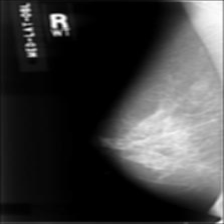

In [ ]:
img

In [ ]:
X_images = []
y_images =[]
for img, label in dataset:
  X_images.append(img)
  y_images.append(label)
X = np.array(X_images)/255
y = np.array(y_images)

#Decoupe

In [ ]:
X.shape

(820, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(656, 224, 224, 3)

In [ ]:
X_test.shape

(164, 224, 224, 3)

#CNN

In [ ]:
model = Sequential()
model.add(Conv2D(100, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation ='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 100)  │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 291600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    29,160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,253,101 (111.59 MB)

 Trainable params: 29,253,101 (111.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=45, validation_split=0.2)

Epoch 1/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 185s 11s/step - accuracy: 0.5905 - loss: 2.1331 - val_accuracy: 0.7652 - val_loss: 0.4469
Epoch 2/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 171s 10s/step - accuracy: 0.7772 - loss: 0.4533 - val_accuracy: 0.8864 - val_loss: 0.3485
Epoch 3/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 163s 9s/step - accuracy: 0.8818 - loss: 0.3305 - val_accuracy: 0.8333 - val_loss: 0.3066
Epoch 4/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.9050 - loss: 0.2489 - val_accuracy: 0.9242 - val_loss: 0.2166
Epoch 5/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 156s 9s/step - accuracy: 0.9341 - loss: 0.2117 - val_accuracy: 0.8788 - val_loss: 0.2760
Epoch 6/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 201s 9s/step - accuracy: 0.9438 - loss: 0.1353 - val_accuracy: 0.9091 - val_loss: 0.1908
Epoch 7/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 146s 9s/step - accuracy: 0.9398 - loss: 0.1485 - val_accuracy: 0.9318 - val_loss: 0.2075
Epoch 8/45
17/17 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.9692 - loss: 0.1193 - val_accuracy: 0.9318 -

#Visualisation

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined